In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime

from statsmodels.graphics.api import qqplot
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
def parser(x):
    return datetime.strptime('19'+x, '%Y-%m')

In [5]:
series = pd.read_csv('https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/sales-of-shampoo-over-a-three-ye.csv',delimiter=";" ,header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [6]:
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

In [7]:
from pylab import rcParams # the following code is to set the subsequent figure sizes
rcParams['figure.figsize'] = 20,8

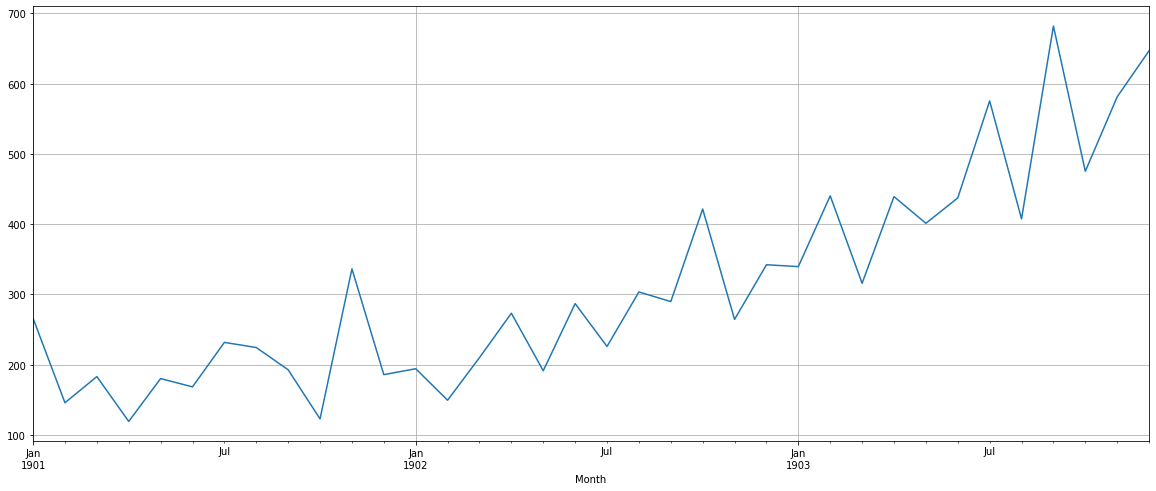

In [8]:
series.plot(grid = True);

## Check the basic measures of descriptive statistics

In [9]:
series.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64

## DECOMPOSING the Time Series and plot the different components.

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

## Additive Decomposition

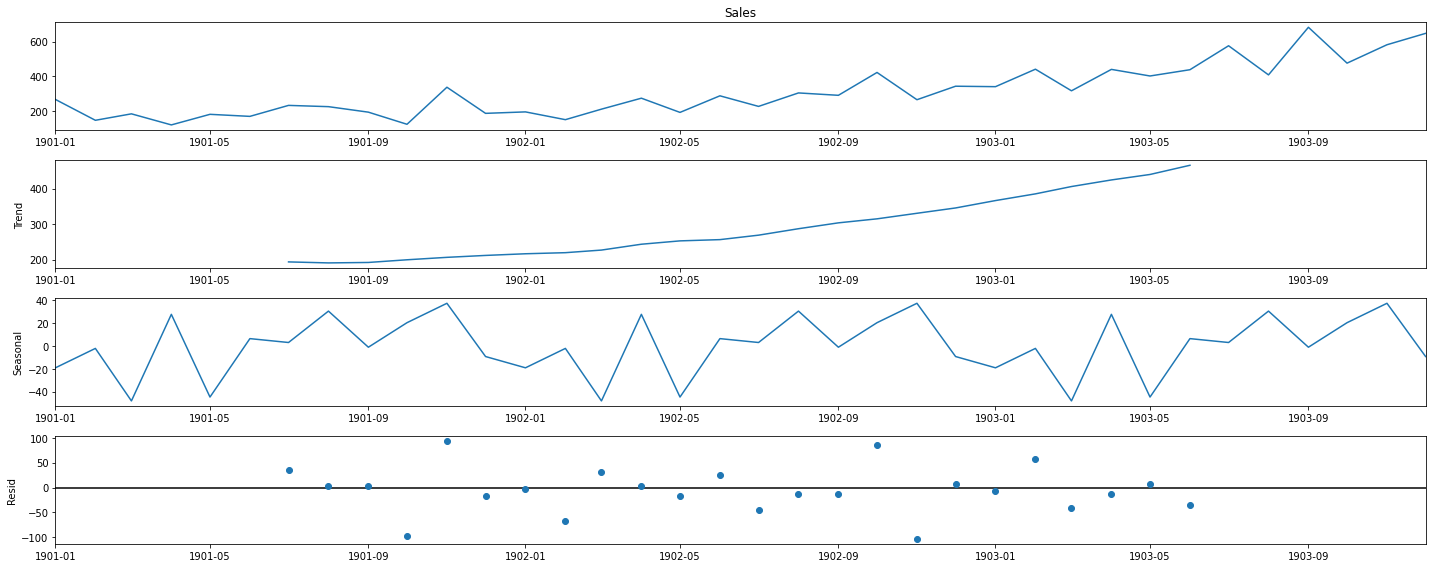

In [11]:
decomposition = seasonal_decompose(series, model='additive')
decomposition.plot();

we see that the residual have a pattern in this decompostion.

In [12]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(10),'\n')
print('Seasonality','\n',seasonality.head(10),'\n')
print('Residual','\n',residual.head(10),'\n')

Trend 
 Month
1901-01-01           NaN
1901-02-01           NaN
1901-03-01           NaN
1901-04-01           NaN
1901-05-01           NaN
1901-06-01           NaN
1901-07-01    193.470833
1901-08-01    190.633333
1901-09-01    191.908333
1901-10-01    199.450000
Name: trend, dtype: float64 

Seasonality 
 Month
1901-01-01   -19.193924
1901-02-01    -2.218924
1901-03-01   -48.175174
1901-04-01    27.591493
1901-05-01   -44.800174
1901-06-01     6.345660
1901-07-01     2.951910
1901-08-01    30.431076
1901-09-01    -1.171007
1901-10-01    20.295660
Name: seasonal, dtype: float64 

Residual 
 Month
1901-01-01          NaN
1901-02-01          NaN
1901-03-01          NaN
1901-04-01          NaN
1901-05-01          NaN
1901-06-01          NaN
1901-07-01    35.377257
1901-08-01     3.435590
1901-09-01     2.062674
1901-10-01   -96.845660
Name: resid, dtype: float64 



## Multiplicative Decompostion

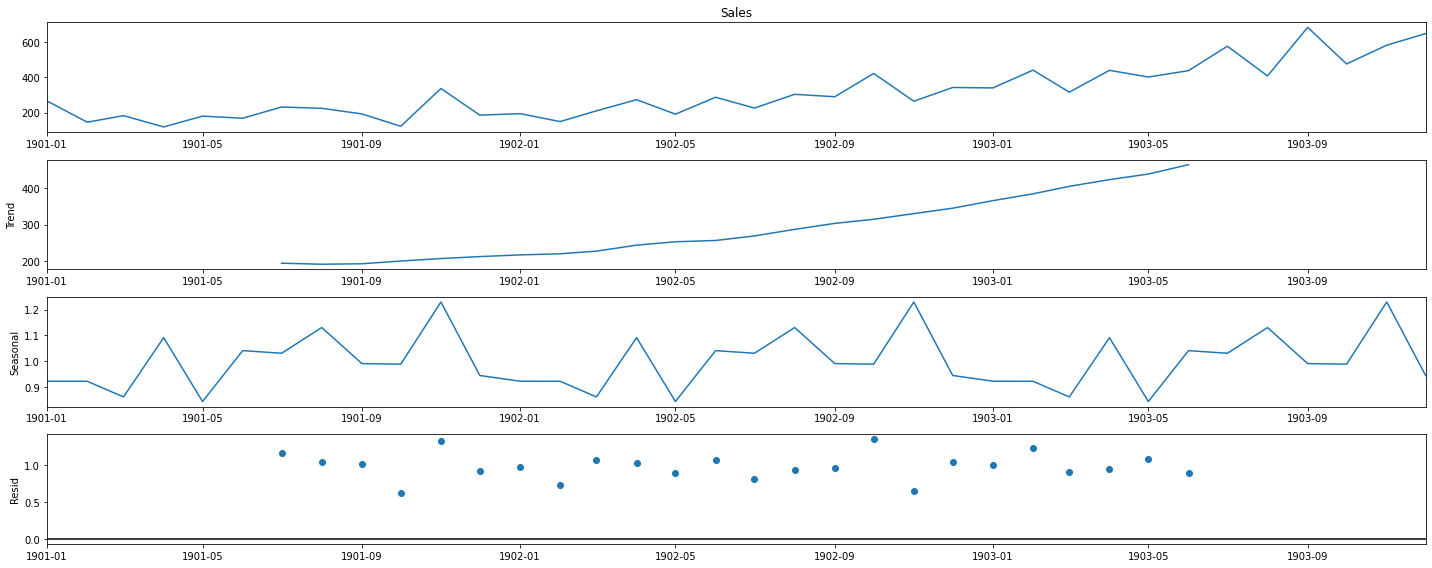

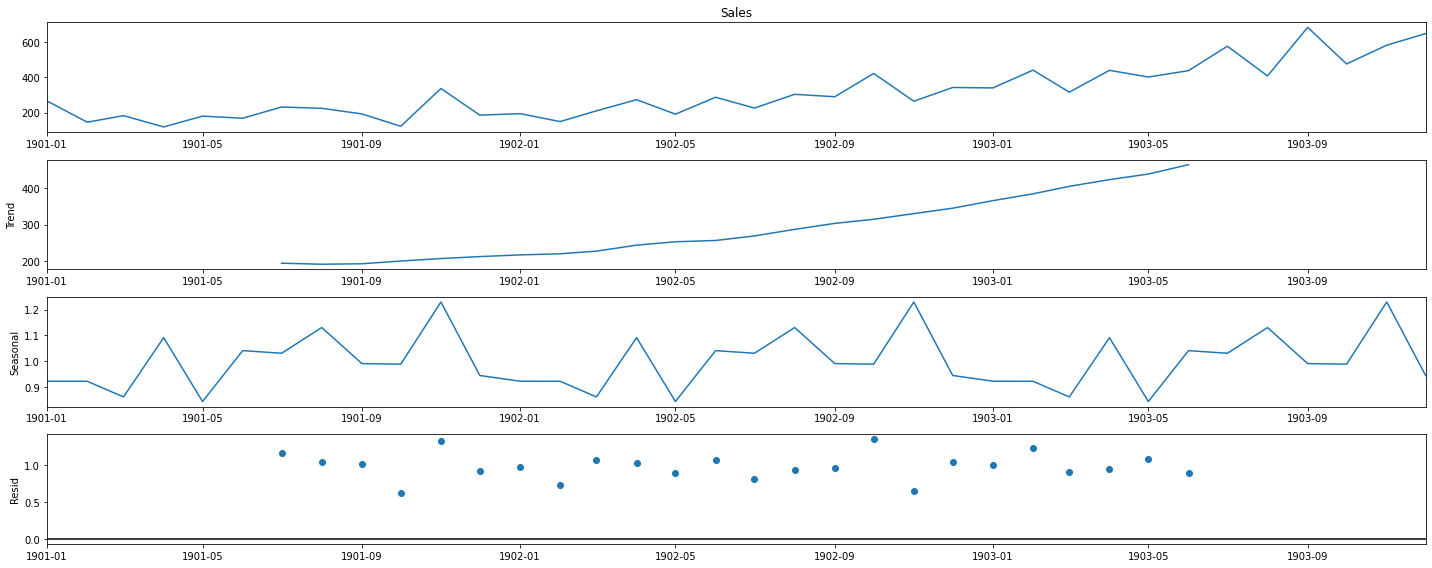

In [13]:
decomposition = seasonal_decompose(series, model='multiplicative')
decomposition.plot()

## CHECK FOR STATIONARY OF THE WHOLE TIME SERIES DATA

the Augumented Dickey-Fuller(ADF) test is an unit root test which determines whether there is a unit root and subsequently whether the series is non - stationary.

the hypothesis in a simple form for ADF test is:

H0 : the Time Series has a unit root and is thus non-stationary. 
H1 : the Time Series does not have a unit root and is thus stationary.

we would want the Time Series to be stationary for building the ARIMA model and thus we would want the p-value of this test to be less than the alpha value.

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
dftest = adfuller(series, regression='ct')
print('DF test statistic is %3.3f'%dftest[0])
print('DF test p-value is ',dftest[1])
print('No. of lags used',dftest[2])

DF test statistic is -0.798
DF test p-value is  0.9658319472800339
No. of lags used 10


here we fail to reject the null hypothesis as p-value is greater than 0.05

let us take one level of differencing to see whether the series becomes stationary

In [16]:
dftest = adfuller(series.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f'%dftest[0])
print('DF test p-value is ',dftest[1])
print('No. of lags used',dftest[2])

DF test statistic is -5.352
DF test p-value is  4.491563929383101e-05
No. of lags used 10


<AxesSubplot:xlabel='Month'>

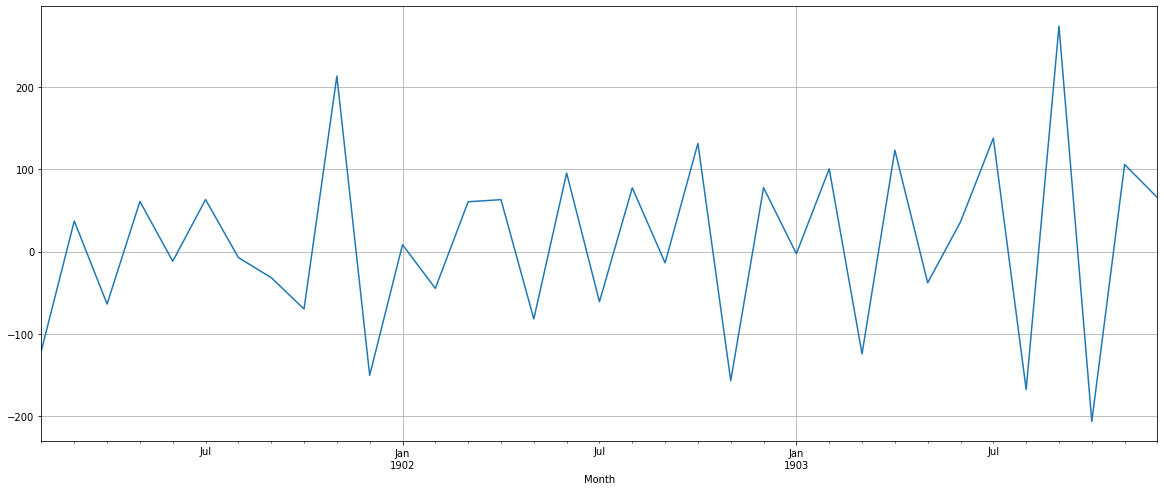

In [17]:
# plot the stationary series
series.diff().dropna().plot(grid = True)

## plot the Autocorrelation and Partial Autocorrelation function plots on the whole data.

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

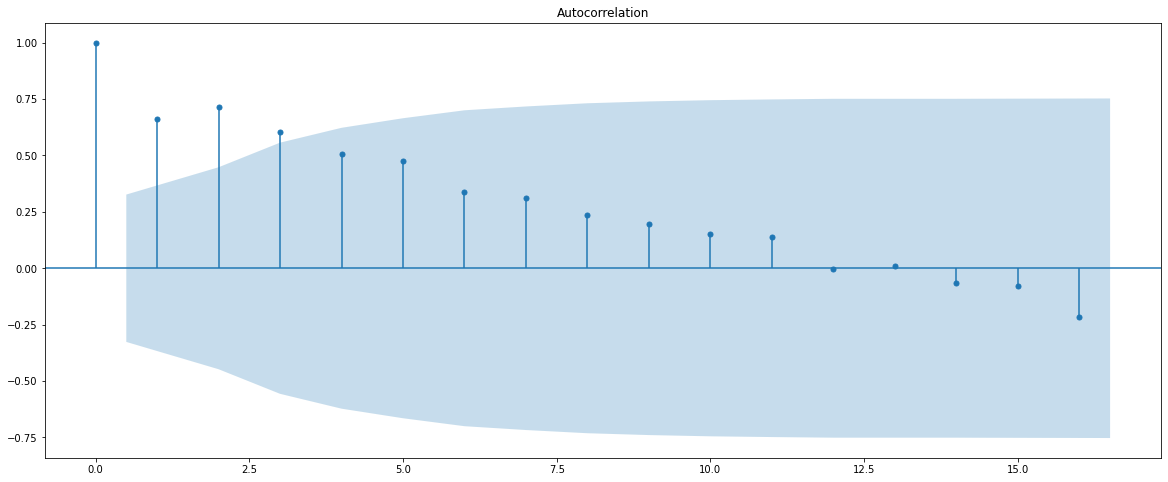

In [19]:
plot_acf(series, alpha=0.05);

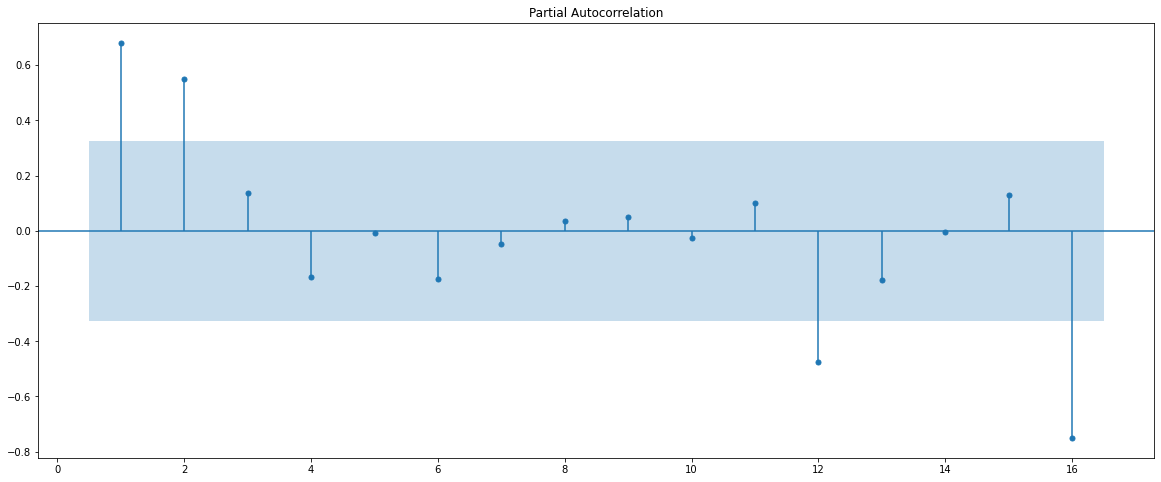

In [20]:
plot_pacf(series, zero=False,alpha=0.05);

## split the data into train and test and plot the training and test data.

In [21]:
series.index.year.unique()

Int64Index([1901, 1902, 1903], dtype='int64', name='Month')

In [22]:
train = series[series.index<='1903']
test  = series[series.index>'1903']

In [23]:
## this is to display multiple dataframes from one cell
from IPython.display import display

In [24]:
print('First few rows of Training data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test data')
display(test.head())
print('Last few rows of Test data')
display(test.tail())

First few rows of Training data


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

Last few rows of Training Data


Month
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
Name: Sales, dtype: float64

First few rows of Test data


Month
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
Name: Sales, dtype: float64

Last few rows of Test data


Month
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64

In [25]:
print(train.shape)
print(test.shape)

(25,)
(11,)


## Check for Stationarity of the Training Data Time Series

<AxesSubplot:xlabel='Month'>

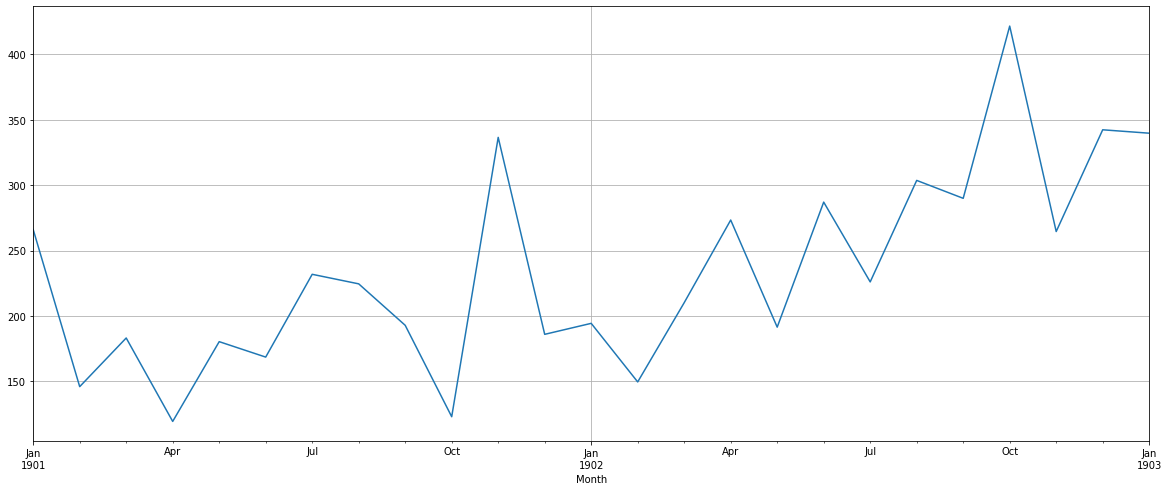

In [26]:
train.plot(grid = True)

In [27]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is  %3.3f' %dftest[0])
print('DF test p-values is   ',dftest[1])
print('Number of lags used   ',dftest[2])

DF test statistic is  -6.411
DF test p-values is    2.887234023219013e-07
Number of lags used    0


the training data is stationary as p value is less than 0.05

In [28]:
train.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 25 entries, 1901-01-01 to 1903-01-01
Series name: Sales
Non-Null Count  Dtype  
--------------  -----  
25 non-null     float64
dtypes: float64(1)
memory usage: 400.0 bytes


## Build an Automated version of ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria(AIC).

Note : we are building ARIMA model both by looking at the minimum AIC and by looking at the ACF and PACF plots.

In [29]:
import itertools
p=q=range(0,5)
d = range(0,1)
pdq = list(itertools.product(p,d,q))
print('Examples of the parameter combinations for the model')
for i in range(0,len(pdq)):
    print('Model : {}'.format(pdq[i]))

Examples of the parameter combinations for the model
Model : (0, 0, 0)
Model : (0, 0, 1)
Model : (0, 0, 2)
Model : (0, 0, 3)
Model : (0, 0, 4)
Model : (1, 0, 0)
Model : (1, 0, 1)
Model : (1, 0, 2)
Model : (1, 0, 3)
Model : (1, 0, 4)
Model : (2, 0, 0)
Model : (2, 0, 1)
Model : (2, 0, 2)
Model : (2, 0, 3)
Model : (2, 0, 4)
Model : (3, 0, 0)
Model : (3, 0, 1)
Model : (3, 0, 2)
Model : (3, 0, 3)
Model : (3, 0, 4)
Model : (4, 0, 0)
Model : (4, 0, 1)
Model : (4, 0, 2)
Model : (4, 0, 3)
Model : (4, 0, 4)


In [30]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns = ['param','AIC'])
ARIMA_AIC

,param,AIC


In [31]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train.values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 0, 0) - AIC:290.9191302255347
ARIMA(0, 0, 1) - AIC:291.6133753237177
ARIMA(0, 0, 2) - AIC:289.84689341135
ARIMA(0, 0, 3) - AIC:291.5675786791699
ARIMA(0, 0, 4) - AIC:287.4415715322421
ARIMA(1, 0, 0) - AIC:290.4302589809668
ARIMA(1, 0, 1) - AIC:288.5398371869911
ARIMA(1, 0, 2) - AIC:288.2268869720115
ARIMA(1, 0, 3) - AIC:288.55742973398435
ARIMA(1, 0, 4) - AIC:287.3537518360349
ARIMA(2, 0, 0) - AIC:286.7209307192975
ARIMA(2, 0, 1) - AIC:288.26972623752386
ARIMA(2, 0, 2) - AIC:289.88318996083535
ARIMA(2, 0, 3) - AIC:291.790062067906
ARIMA(2, 0, 4) - AIC:289.12944233100995
ARIMA(3, 0, 0) - AIC:288.5839080401177
ARIMA(3, 0, 1) - AIC:290.2205570153059
ARIMA(3, 0, 2) - AIC:291.8614340665478
ARIMA(3, 0, 3) - AIC:291.0978689123528
ARIMA(3, 0, 4) - AIC:289.17752888802937
ARIMA(4, 0, 0) - AIC:288.98191649816204
ARIMA(4, 0, 1) - AIC:290.9809246893877
ARIMA(4, 0, 2) - AIC:288.0903128919594
ARIMA(4, 0, 3) - AIC:289.92450212231046
ARIMA(4, 0, 4) - AIC:291.06806438399764


In [32]:
ARIMA_AIC.sort_values(by ='AIC',ascending=True).head()

,param,AIC
10,"(2, 0, 0)",286.720931
9,"(1, 0, 4)",287.353752
4,"(0, 0, 4)",287.441572
22,"(4, 0, 2)",288.090313
7,"(1, 0, 2)",288.226887


In [33]:
auto_ARIMA = ARIMA(train, order=(2,0,0))
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   25
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -139.360
Date:                Thu, 07 Jul 2022   AIC                            286.721
Time:                        11:26:14   BIC                            291.596
Sample:                    01-01-1901   HQIC                           288.073
                         - 01-01-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.4038     37.193      6.544      0.000     170.506     316.302
ar.L1          0.1814      0.200      0.906      0.365      -0.211       0.574
ar.L2          0.4802      0.250      1.920      0.0

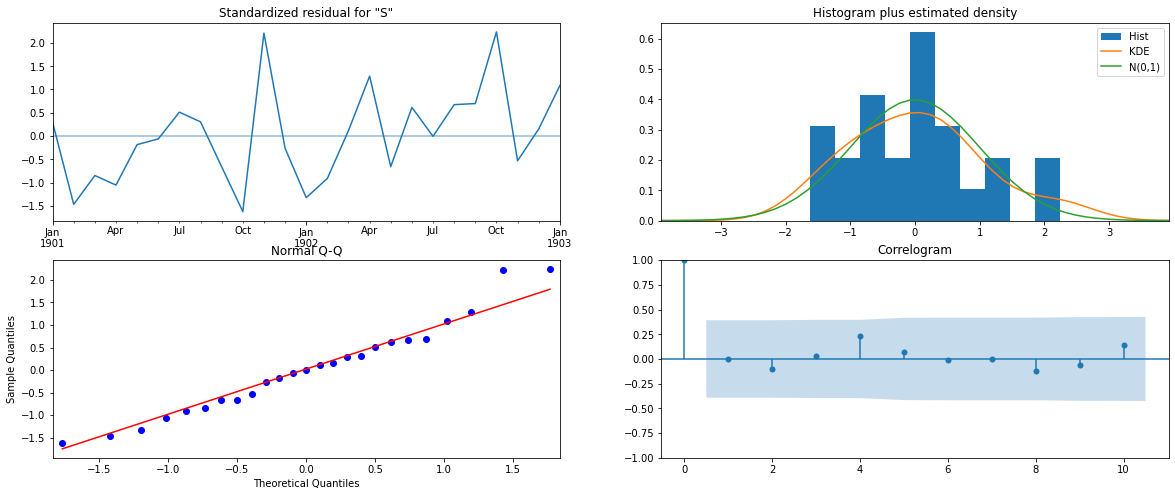

In [34]:
results_auto_ARIMA.plot_diagnostics();

## Predict on theTest Set using this model and evaluate the model.

In [35]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps = len(test))

In [36]:
## Mean Absolute Percentage Error (MAPE) - Function DEfinition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/y_true)*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE
from sklearn.metrics import mean_squared_error

In [37]:
rmse = mean_squared_error(test,predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test,predicted_auto_ARIMA)
print('RMSE : ',rmse,'\nMAPE : ',mape)

RMSE :  251.98083132019278 
MAPE :  41.41513891425462
